In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast

import iqplot

import bokeh.io
import bokeh.models
import bokeh.plotting
import ast

bokeh.io.output_notebook()

Loading BokehJS ...

In [70]:
Data = pd.read_csv('/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/MultiSensory_Project/GatedArenas/Results/DataSetAugust22.csv')
Data.head()

,Unnamed: 0,Date,Fly,Training,ObjectsReinforced,Training Starvation,Test Starvation,Reinforced_side,Relative Time Left,Relative Time Right,...,Visits Right Corner,Durations Right Corner,Visits Top Corner,Durations Top Corner,Visits Left Front,Durations Left Front,Visits Right Front,Durations Right Front,Visits Top Front,Durations Top Front
0,0,22-03-10,1,Ctrl,Orange,Not starved,With Water,Left,0.168639,0.831361,...,"[576, 6962, 15366, 22027, 28965, 32177, 40209]","[11, 4062, 83, 1, 277, 1128, 2829]",[2079],[28],"[1153, 4888, 5728, 38118, 38612]","[46, 181, 4, 464, 2]","[554, 2278, 2482, 2486, 2518, 2521, 2683, 6196...","[5, 199, 1, 4, 1, 156, 23, 789, 1289, 9, 4, 2,...","[393, 737, 1458, 6213, 6880, 6883, 17543, 1800...","[161, 420, 634, 666, 1, 23, 465, 8, 3, 3, 38, ..."
1,0,22-03-10,2,Ctrl,Orange,Not starved,With Water,Left,0.414249,0.585751,...,"[743, 939, 1104, 4737, 5786, 6775, 9233, 12181...","[35, 23, 1, 5, 7, 27, 68, 13, 124, 69, 428, 9,...","[0, 82, 443, 515, 1452, 2698, 4466, 4613, 5938...","[5, 47, 9, 32, 32, 18, 42, 39, 28, 42, 8, 73, ...","[314, 413, 1604, 2656, 2808, 6036, 6096, 6258,...","[35, 25, 687, 38, 541, 59, 5, 65, 49, 308, 43,...","[187, 834, 1037, 4635, 5752, 6749, 6891, 8708,...","[87, 44, 38, 29, 33, 16, 300, 45, 2, 56, 63, 5...","[109, 390, 537, 1205, 2688, 4400, 4622, 5431, ...","[63, 53, 194, 255, 15, 90, 42, 343, 60, 325, 2..."
2,0,22-03-10,3,Ctrl,Orange,Not starved,With Water,Left,0.534949,0.465051,...,"[2126, 3231, 3846, 4079, 5983, 6896, 9459, 975...","[81, 22, 26, 66, 19, 50, 83, 26, 78, 11, 80, 2...","[546, 1112, 1178, 1988, 2404, 2558, 5008, 5074...","[15, 4, 81, 38, 7, 87, 1, 69, 2, 46, 13, 72, 2...","[187, 515, 655, 1100, 1330, 1881, 2393, 2481, ...","[20, 31, 38, 3, 34, 12, 6, 4, 1, 6, 38, 77, 64...","[763, 853, 1672, 2156, 3210, 3821, 4079, 4102,...","[8, 22, 25, 18, 36, 29, 6, 35, 26, 39, 7, 40, ...","[151, 519, 1079, 1855, 2014, 2369, 3399, 6136,...","[42, 33, 30, 29, 32, 34, 32, 55, 13, 32, 45, 4..."
3,0,22-03-10,4,Ctrl,Orange,Not starved,With Water,Left,0.385910,0.614090,...,"[29690, 43118]","[940, 2]",[55],[69],"[11093, 12227, 12231, 12254, 15174, 33455]","[1052, 2, 20, 2917, 2, 6661]","[194, 3660, 4015, 4046, 4077, 4113, 4161, 4313...","[31, 342, 1, 29, 35, 47, 146, 6, 4, 17, 2253, ...","[89, 23968, 39427, 40293, 40296, 40299, 40303,...","[105, 4188, 861, 2, 1, 1, 2, 1, 1289]"
4,0,22-03-10,5,Ctrl,Orange,Not starved,With Water,Left,0.345411,0.654589,...,"[225, 667, 1050, 1534, 1575, 1703, 2222, 2431,...","[10, 5, 19, 3, 28, 65, 106, 32, 1, 37, 52, 39,...","[531, 568, 900, 1158, 1345, 1551, 2045, 2145, ...","[27, 40, 36, 61, 8, 47, 45, 23, 40, 53, 53, 55...","[363, 493, 874, 2011, 2966, 3642, 3801, 4028, ...","[49, 28, 22, 29, 29, 32, 41, 31, 43, 35, 38, 4...","[200, 633, 1056, 1186, 1502, 1720, 2194, 2444,...","[18, 98, 20, 29, 93, 34, 36, 34, 69, 43, 38, 6...","[199, 471, 597, 890, 1186, 1313, 1465, 2032, 2...","[1, 67, 36, 12, 23, 30, 37, 22, 34, 36, 16, 9,..."


In [71]:
Data_noWater = Data[Data['Test Starvation'] == "Overnight no Water"]
Data_noWater_Simple = Data_noWater[Data_noWater["Training Starvation"] == "Not starved"]#.reset_index()

In [74]:
Data_noWater_Simple["Peeks Left"] = [160] * len(Data_noWater_Simple)

/var/folders/3v/_y6xq12x6l96bm2kp__gv6z40000gn/T/ipykernel_8001/1112384828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_noWater_Simple["Peeks Left"] = [160] * len(Data_noWater_Simple)


In [86]:
param = 160

for index, row in Data_noWater_Simple.iterrows():
    print (row['Durations Left Corner'])

    #print (1 for i in row['Durations Left Corner'])
    Data_noWater_Simple.loc[index,"Peeks Left"] = sum(1 for i in ast.literal_eval(row['Durations Left Corner']) if i > param)
    #Data_noWater_Simple['Peeks Left'][rows]= sum(1 for i in Data['Durations Left Corner'][rows] if i > param)


       # Data_noWater_Simple.apply(sum(1 for i in Data['Durations Left Corner'] if i > param) for elements in Data['Durations Left Corner'])
Data_noWater_Simple['Peeks Left']

[16, 48, 1, 39]
[31, 21, 45, 70, 111, 37, 28, 89, 129, 1]
[16, 40, 41, 4, 42, 40, 49, 21, 44, 24, 46, 53, 46, 61, 2, 73, 93, 10, 18, 98, 7, 2, 118, 85, 93, 59, 22, 148]
[4, 59, 3, 63, 123, 7, 14, 18, 153, 471, 89, 13, 82, 92, 61, 62, 82, 38, 4, 31, 11, 8, 32, 5, 29, 35, 53, 33, 5, 28, 32, 4, 13, 8, 92, 3, 92, 21, 113, 3, 6, 70, 19, 9, 14, 114]
[18, 5426]
[]
[72, 374, 32, 97, 3, 507, 112, 2, 1418, 800, 15, 29, 187, 150, 1, 54, 592, 12, 19, 99, 39, 208, 6, 1, 102, 250, 80, 8, 33, 1502, 2, 1, 97, 3, 738, 81, 1, 124]
[113, 20, 101, 9, 309, 32, 7, 269, 142, 8]
[29, 45, 21, 723, 1, 37, 594, 86, 58, 93, 7, 70, 2, 3, 11, 116, 44, 133, 148, 138, 49, 25, 15, 4, 3, 338, 59, 109, 141, 1, 25, 11, 232, 8]
[37, 82, 36, 23, 49, 7, 58, 92, 24, 34, 31, 103, 32, 62, 68, 124, 41, 103, 109, 204, 126, 7, 167, 731, 270, 153, 198, 42, 59, 135]
[18, 91, 6, 57, 44, 1, 68, 6, 34, 10, 83, 2, 18, 43, 4, 62, 4, 25, 15, 62, 10, 47, 4, 36, 34, 137, 74, 73, 15, 156, 6, 6, 79, 84, 7, 3, 97, 91, 77, 5, 93, 27, 83, 4, 19

5      0
6      0
7      0
8      1
9      1
15     0
16    10
17     2
18     4
19     5
20     1
24     1
25    11
26     2
33     1
34     1
35     2
36     1
37     0
38     1
39     7
40     0
41     3
42     3
43     0
44     0
45     3
46     0
47     4
48     0
49     1
50     1
51     0
52     3
53     1
54     4
55     2
56     3
61     0
62     0
63     1
64     7
65     0
66     1
67     0
68     6
69     0
70     2
71     0
72     1
73     0
74     1
75     0
76     4
Name: Peeks Left, dtype: int64

In [87]:
p_box = iqplot.stripbox(data=Data_noWater_Simple,
                   q="Peeks Left",
                   cats="Training",
                   )

bokeh.io.show(p_box)

In [36]:
row = 10
Data_noWater_Simple['Durations Left Corner'][row]

'[18, 91, 6, 57, 44, 1, 68, 6, 34, 10, 83, 2, 18, 43, 4, 62, 4, 25, 15, 62, 10, 47, 4, 36, 34, 137, 74, 73, 15, 156, 6, 6, 79, 84, 7, 3, 97, 91, 77, 5, 93, 27, 83, 4, 197, 114, 84, 118, 6]'

In [88]:
source = bokeh.models.ColumnDataSource(dict(Training=Data_noWater_Simple["Training"],
                                            LCDurations= Data_noWater_Simple['Durations Left Corner'],
                                            LPeeks=Data_noWater_Simple['Peeks Left']))

In [89]:
source.data['LPeeks']

5      0
6      0
7      0
8      1
9      1
15     0
16    10
17     2
18     4
19     5
20     1
24     1
25    11
26     2
33     1
34     1
35     2
36     1
37     0
38     1
39     7
40     0
41     3
42     3
43     0
44     0
45     3
46     0
47     4
48     0
49     1
50     1
51     0
52     3
53     1
54     4
55     2
56     3
61     0
62     0
63     1
64     7
65     0
66     1
67     0
68     6
69     0
70     2
71     0
72     1
73     0
74     1
75     0
76     4
Name: Peeks Left, dtype: int64

In [125]:


Durs = source.data['LCDurations']
Durs = Durs.values
#for i in Durs:
    #Durs[i] = ast.literal_eval(Durs[i])

In [130]:
param = 40
for j in Durs:
    #print(source.data['LCDurations'][row])
    LPeeks = sum(1 for i in ast.literal_eval(Durs[j]) if i > param)
    #source.data.loc["LPeeks"] = sum(1 for i in ast.literal_eval(source.data['LCDurations'][row]) if i > param)

#source.data["LPeeks"]

ValueError: malformed node or string: array(['[5, 26, 5, 20, 25, 48, 30, 53, 116, 20, 56, 84, 3, 61, 53, 37, 75, 71, 48, 32, 107, 21, 26, 5, 26, 39, 48, 6, 64, 2, 4, 55, 4, 30, 7, 569, 89, 9, 2, 22, 7, 1068, 20, 30]',
       '[8, 42, 59, 57, 15, 94, 1, 57, 6, 7, 90, 1, 115, 3, 110, 92, 78, 11, 4, 79, 29, 20, 65, 20, 95, 9, 9, 49, 18, 21, 29, 54, 20, 18, 65, 16, 101, 11, 77, 14, 41, 10, 65, 6, 9, 13, 6, 52, 61, 1, 21, 23, 117, 14, 26, 25, 85, 14, 16, 14, 63, 4, 74, 1, 21, 98]',
       '[31, 21, 45, 70, 111, 37, 28, 89, 129, 1]',
       '[10, 62, 57, 41, 74, 99, 86, 25, 81, 93, 46, 22, 28, 19, 42, 79, 57, 59, 22, 24, 19, 48, 19, 43, 69, 52, 21, 20, 18, 62, 63, 21, 49, 78, 22, 22, 21, 18, 78, 21, 24, 21, 16, 74, 73, 18, 58, 27, 19, 20, 17, 22, 21]'],
      dtype=object)

In [12]:
Melted = pd.melt(Data_noWater_Simple,
                 id_vars=['Training', 'ObjectsReinforced','Reinforced_side',
                          'Fly', 'Date'],
                 value_name = 'Count',
                 value_vars=['Peeks Left', 'Peeks Right', 'Peeks Top', 'Long Peeks Left', 'Long Peeks Right', 'Long Peeks Top','Face Left', 'Face Right', 'Face Top'],
                 var_name='Type')

KeyError: "The following 'value_vars' are not present in the DataFrame: ['Face Left', 'Face Right', 'Face Top', 'Long Peeks Left', 'Long Peeks Right', 'Long Peeks Top', 'Peeks Left', 'Peeks Right', 'Peeks Top']"

In [11]:
conditions = [
    (Melted['Reinforced_side'].str.contains('Right') & (Melted['Type'].str.contains('Right'))),
    (Melted['Reinforced_side'].str.contains('Left') & (Melted['Type'].str.contains('Left'))),
    (Melted['Reinforced_side'].str.contains('Right') & (Melted['Type'].str.contains('Left'))),
    (Melted['Reinforced_side'].str.contains('Left') & (Melted['Type'].str.contains('Right'))),
    (Melted['Type'].str.contains('Top')),
]

values = ['Rewarded Side', 'Rewarded Side', 'Punished Side', 'Punished Side', 'Empty Side']
Melted['Condition'] = np.select(conditions,values)
Melted.head()

NameError: name 'Melted' is not defined

In [16]:
conditions = [
    (Melted['Type'].str.contains('Long')),
    (Melted['Type'].str.contains('Face')),
    (('Long' not in Melted['Type']) & ('Face' not in Melted['Type'])) # This is not really working but still gives expected result
]

values = ['Squeeze', 'Fronts', 'Peeks']
Melted['Beh'] = np.select(conditions,values)
Melted.head()

,Training,ObjectsReinforced,Reinforced_side,Fly,Date,Type,Count,Condition,Beh
0,Ctrl,Orange,Left,6,22-03-10,Peeks Left,0,Rewarded Side,Peeks
1,Ctrl,Orange,Left,7,22-03-10,Peeks Left,0,Rewarded Side,Peeks
2,Ctrl,Orange,Left,8,22-03-10,Peeks Left,0,Rewarded Side,Peeks
3,Ctrl,Orange,Left,9,22-03-10,Peeks Left,1,Rewarded Side,Peeks
4,Ctrl,Orange,Left,10,22-03-10,Peeks Left,1,Rewarded Side,Peeks


<function matplotlib.pyplot.show(close=None, block=None)>

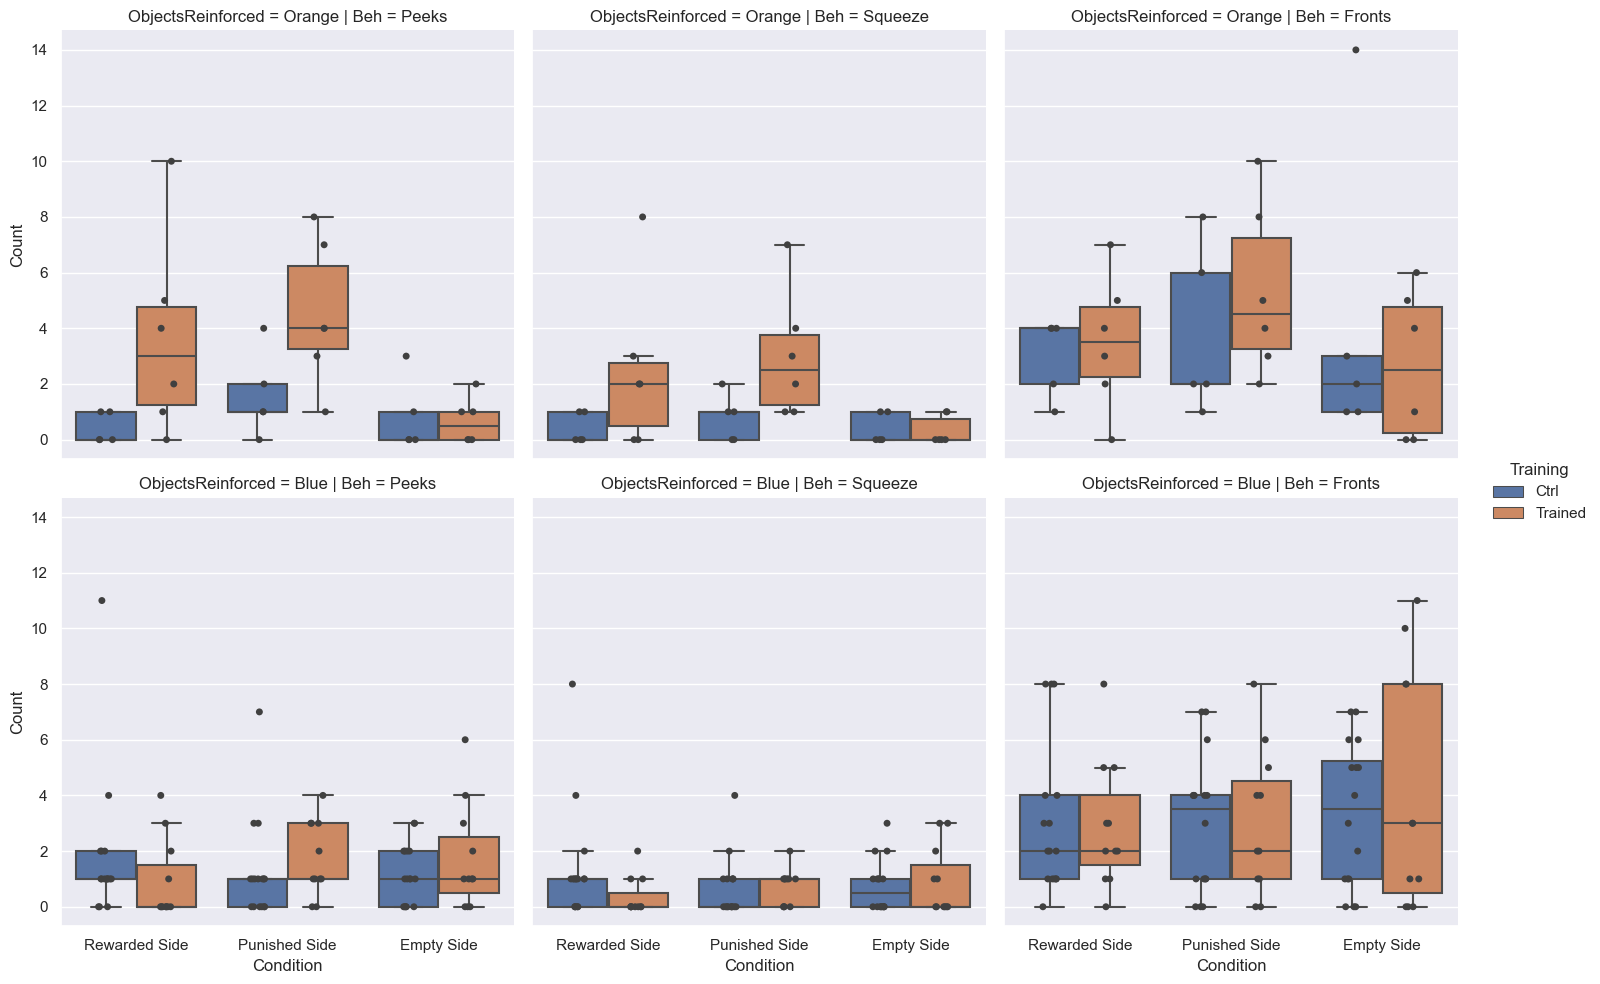

In [17]:
sns.set(font_scale=1)
g=sns.catplot(x='Condition', y = 'Count',
            hue='Training', showfliers = False,
            col='Beh',
            kind="box",
            row='ObjectsReinforced',
            data= Melted)
g.map_dataframe(sns.stripplot,x='Condition', y = 'Count',
            hue='Training', dodge=True,
            palette=["#404040"])
plt.show

#plt.savefig('/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/MultiSensory_Project/GatedArenas/Results/220722_BehaviorPlot_ObjectSplit.png')

In [8]:
Melted.Training = pd.Categorical(Melted.Training,
                                 categories=['Trained', 'Ctrl'])

In [67]:
TimeData = pd.read_csv('/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/MultiSensory_Project/GatedArenas/Results/DataSetNew.csv')

TimeData.head()

,Unnamed: 0,Date,Fly,Training,ObjectsReinforced,Training Starvation,Test Starvation,Reinforced_side,Relative Time Left,Relative Time Right,...,Visits Right Corner,Durations Right Corner,Visits Top Corner,Durations Top Corner,Visits Left Front,Durations Left Front,Visits Right Front,Durations Right Front,Visits Top Front,Durations Top Front
0,0,22-03-10,1,Ctrl,Orange,Not starved,With Water,Left,0.168639,0.831361,...,"[576, 6962, 15366, 22027, 28965, 32177, 40209]","[11, 4062, 83, 1, 277, 1128, 2829]",[2079],[28],"[1153, 4888, 5728, 38118, 38612]","[46, 181, 4, 464, 2]","[554, 2278, 2482, 2486, 2518, 2521, 2683, 6196...","[5, 199, 1, 4, 1, 156, 23, 789, 1289, 9, 4, 2,...","[393, 737, 1458, 6213, 6880, 6883, 17543, 1800...","[161, 420, 634, 666, 1, 23, 465, 8, 3, 3, 38, ..."
1,0,22-03-10,2,Ctrl,Orange,Not starved,With Water,Left,0.414249,0.585751,...,"[743, 939, 1104, 4737, 5786, 6775, 9233, 12181...","[35, 23, 1, 5, 7, 27, 68, 13, 124, 69, 428, 9,...","[0, 82, 443, 515, 1452, 2698, 4466, 4613, 5938...","[5, 47, 9, 32, 32, 18, 42, 39, 28, 42, 8, 73, ...","[314, 413, 1604, 2656, 2808, 6036, 6096, 6258,...","[35, 25, 687, 38, 541, 59, 5, 65, 49, 308, 43,...","[187, 834, 1037, 4635, 5752, 6749, 6891, 8708,...","[87, 44, 38, 29, 33, 16, 300, 45, 2, 56, 63, 5...","[109, 390, 537, 1205, 2688, 4400, 4622, 5431, ...","[63, 53, 194, 255, 15, 90, 42, 343, 60, 325, 2..."
2,0,22-03-10,3,Ctrl,Orange,Not starved,With Water,Left,0.534949,0.465051,...,"[2126, 3231, 3846, 4079, 5983, 6896, 9459, 975...","[81, 22, 26, 66, 19, 50, 83, 26, 78, 11, 80, 2...","[546, 1112, 1178, 1988, 2404, 2558, 5008, 5074...","[15, 4, 81, 38, 7, 87, 1, 69, 2, 46, 13, 72, 2...","[187, 515, 655, 1100, 1330, 1881, 2393, 2481, ...","[20, 31, 38, 3, 34, 12, 6, 4, 1, 6, 38, 77, 64...","[763, 853, 1672, 2156, 3210, 3821, 4079, 4102,...","[8, 22, 25, 18, 36, 29, 6, 35, 26, 39, 7, 40, ...","[151, 519, 1079, 1855, 2014, 2369, 3399, 6136,...","[42, 33, 30, 29, 32, 34, 32, 55, 13, 32, 45, 4..."
3,0,22-03-10,4,Ctrl,Orange,Not starved,With Water,Left,0.385910,0.614090,...,"[29690, 43118]","[940, 2]",[55],[69],"[11093, 12227, 12231, 12254, 15174, 33455]","[1052, 2, 20, 2917, 2, 6661]","[194, 3660, 4015, 4046, 4077, 4113, 4161, 4313...","[31, 342, 1, 29, 35, 47, 146, 6, 4, 17, 2253, ...","[89, 23968, 39427, 40293, 40296, 40299, 40303,...","[105, 4188, 861, 2, 1, 1, 2, 1, 1289]"
4,0,22-03-10,5,Ctrl,Orange,Not starved,With Water,Left,0.345411,0.654589,...,"[225, 667, 1050, 1534, 1575, 1703, 2222, 2431,...","[10, 5, 19, 3, 28, 65, 106, 32, 1, 37, 52, 39,...","[531, 568, 900, 1158, 1345, 1551, 2045, 2145, ...","[27, 40, 36, 61, 8, 47, 45, 23, 40, 53, 53, 55...","[363, 493, 874, 2011, 2966, 3642, 3801, 4028, ...","[49, 28, 22, 29, 29, 32, 41, 31, 43, 35, 38, 4...","[200, 633, 1056, 1186, 1502, 1720, 2194, 2444,...","[18, 98, 20, 29, 93, 34, 36, 34, 69, 43, 38, 6...","[199, 471, 597, 890, 1186, 1313, 1465, 2032, 2...","[1, 67, 36, 12, 23, 30, 37, 22, 34, 36, 16, 9,..."


In [68]:
TimeMelted = pd.melt(TimeData, id_vars=['Training', 'ObjectsReinforced',
                                        'Reinforced_side', 'Date', 'Fly'],
                     value_name = 'Values',
                     value_vars=['Visits Left Corner', 'Durations Left Corner',
          'Visits Right Corner', 'Durations Right Corner',
          'Visits Top Corner', 'Durations Top Corner',
          'Visits Left Front', 'Durations Left Front',
          'Visits Right Front', 'Durations Right Front',
          'Visits Top Front', 'Durations Top Front'],
                     var_name="Variable")

TimeMelted[['Values',]] = TimeMelted[['Values',]].applymap(ast.literal_eval)
TimeMelted = TimeMelted.explode('Values').drop_duplicates()

conditions = [
    (TimeMelted['Variable'].str.contains('Durations')),
    (TimeMelted['Variable'].str.contains('Visits')),
]

values = ['Durations', 'Visits']
TimeMelted['Kind'] = np.select(conditions,values)
TimeMelted.head()

conditions = [
    (TimeMelted['Reinforced_side'].str.contains('Right') & (TimeMelted['Variable'].str.contains('Right'))),
    (TimeMelted['Reinforced_side'].str.contains('Left') & (TimeMelted['Variable'].str.contains('Left'))),
    (TimeMelted['Reinforced_side'].str.contains('Right') & (TimeMelted['Variable'].str.contains('Left'))),
    (TimeMelted['Reinforced_side'].str.contains('Left') & (TimeMelted['Variable'].str.contains('Right'))),
    (TimeMelted['Variable'].str.contains('Top')),
]

values = ['Rewarded Side', 'Rewarded Side', 'Punished Side', 'Punished Side', 'Empty Side']
TimeMelted['Condition'] = np.select(conditions,values)
TimeMelted.head()

,Training,ObjectsReinforced,Reinforced_side,Date,Fly,Variable,Values,Kind,Condition
0,Ctrl,Orange,Left,22-03-10,1,Visits Left Corner,NaN,Visits,Rewarded Side
1,Ctrl,Orange,Left,22-03-10,2,Visits Left Corner,452,Visits,Rewarded Side
1,Ctrl,Orange,Left,22-03-10,2,Visits Left Corner,2689,Visits,Rewarded Side
1,Ctrl,Orange,Left,22-03-10,2,Visits Left Corner,4476,Visits,Rewarded Side
1,Ctrl,Orange,Left,22-03-10,2,Visits Left Corner,4538,Visits,Rewarded Side


In [11]:
ReinforcedVisit = TimeMelted[TimeMelted['Condition'] == "Rewarded Side"]

ReinforcedVisit.loc[ReinforcedVisit['Variable'].str.contains('Visits'), 'Variable'] = 'Visits'
ReinforcedVisit.loc[ReinforcedVisit['Variable'].str.contains('Durations'), 'Variable'] = 'Durations'

ReinforcedVisit = ReinforcedVisit.reset_index().pivot_table(index = ['Fly', 'Training', 'ObjectsReinforced'],
                                          columns = 'Variable',
                                          values = 'Values').reset_index()

In [12]:
PunishedVisits = TimeMelted[TimeMelted['Condition'] == "Punished Side"]

PunishedVisits.loc[PunishedVisits['Variable'].str.contains('Visits'), 'Variable'] = 'Visits'
PunishedVisits.loc[PunishedVisits['Variable'].str.contains('Durations'), 'Variable'] = 'Durations'

PunishedVisits = PunishedVisits.reset_index().pivot_table(index = ['Fly', 'Training', 'ObjectsReinforced'],
                                          columns = 'Variable',
                                          values = 'Values').reset_index()

In [13]:
# Create the figure, stored in variable `p`
p = bokeh.plotting.figure(
    frame_width=400,
    frame_height=300,
    x_axis_label='Visits time',
    y_axis_label='Visits duration',
    x_range=[0, 48000]
)


p.circle(
    source= ReinforcedVisit[ReinforcedVisit['Training']== 'Trained'],
    x='Visits',
    y='Durations',
    legend_label = 'Trained flies',

)

p.circle(
    source=ReinforcedVisit[ReinforcedVisit['Training']== 'Ctrl'],
    x='Visits',
    y='Durations',
    color = 'orange',
    legend_label = 'Control flies'
)

bokeh.io.show(p)

In [14]:
# Create the figure, stored in variable `p`
p = bokeh.plotting.figure(
    frame_width=400,
    frame_height=300,
    x_axis_label='Visits time',
    y_axis_label='Visits duration',
    x_range=[0, 48000]
)


p.circle(
    source= PunishedVisits[PunishedVisits['Training']== 'Trained'],
    x='Visits',
    y='Durations',
    legend_label = 'Trained flies'
)

p.circle(
    source=PunishedVisits[PunishedVisits['Training']== 'Ctrl'],
    x='Visits',
    y='Durations',
    color = 'orange',
    legend_label = 'Control flies'
)

bokeh.io.show(p)

In [15]:
EmptyVisits = TimeMelted[TimeMelted['Condition'] == "Empty Side"]

EmptyVisits.loc[EmptyVisits['Variable'].str.contains('Visits'), 'Variable'] = 'Visits'
EmptyVisits.loc[EmptyVisits['Variable'].str.contains('Durations'), 'Variable'] = 'Durations'

EmptyVisits = EmptyVisits.reset_index().pivot_table(index = ['Fly', 'Training', 'ObjectsReinforced'],
                                          columns = 'Variable',
                                          values = 'Values').reset_index()

In [16]:
# Create the figure, stored in variable `p`
p = bokeh.plotting.figure(
    frame_width=400,
    frame_height=300,
    x_axis_label='Visits time',
    y_axis_label='Visits duration',
    x_range=[0, 48000]
)


p.circle(
    source= EmptyVisits[EmptyVisits['Training']== 'Trained'],
    x='Visits',
    y='Durations',
    legend_label = 'Trained flies'
)

p.circle(
    source=EmptyVisits[EmptyVisits['Training']== 'Ctrl'],
    x='Visits',
    y='Durations',
    color = 'orange',
    legend_label = 'Control flies'
)

bokeh.io.show(p)

In [17]:
RightCornerVisits = TimeMelted[TimeMelted['Variable'].isin(['Visits Right Corner', 'Durations Right Corner'])].reset_index().pivot_table(index = ['Fly', 'Training'], columns = 'Variable', values = 'Values').reset_index()

# Create the figure, stored in variable `p`
p = bokeh.plotting.figure(
    frame_width=400,
    frame_height=300,
    x_axis_label='Visits time',
    y_axis_label='Visits duration'
)


p.circle(
    source= RightCornerVisits[RightCornerVisits['Training']== 'Trained'],
    x='Visits Right Corner',
    y='Durations Right Corner',
    legend_label = 'Trained flies'
)

p.circle(
    source=RightCornerVisits[RightCornerVisits['Training']== 'Ctrl'],
    x='Visits Right Corner',
    y='Durations Right Corner',
    color = 'orange',
    legend_label = 'Control flies'
)

bokeh.io.show(p)

Bokeh boxplots

In [19]:

ThreshSlider = bokeh.models.Slider(
    title="Peeks",
    start=0,
    end=600,
    step=10,
    value=160
)


def slider_callback(attr, old, new):
    param = ThreshSlider.value

    Data['Peekings_Left'] = sum(1 for i in Data['Durations_Corner_Left'] if i > param)
    #Peeks_Right = sum(1 for i in Durations_Corner_Right if i > 160)
    #Peeks_Top = sum(1 for i in Durations_Corner_Top if i > 160)

slider.on_change("value", slider_callback)

p_box = iqplot.stripbox(data=Data,
                   q="Peekings_Left",
                   cats="Training",
                   )

Box_layout = bokeh.layouts.row(
    p_box,
    bokeh.models.Spacer(width=15),
    bokeh.layouts.column(
        ThreshSlider,
        width=200,
    ),
)

def induction_app(doc):
    doc.add_root(induction_layout)

In [6]:
param = 160

Data['Peekings_Left'] = sum(1 for i in Data['Durations Left Corner'] if i > param)


TypeError: '>' not supported between instances of 'str' and 'int'